# Total Rentals for whole Munich per Hour 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split

from bikesharing.ml_logic.model import get_folds, train_test_indices
from bikesharing.interface.main import *
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error

In [2]:
df_X = pd.read_csv('~/.lewagon/bikesharing/data/processed/X_processed_from_2019_to_2022.csv')
df_y = pd.read_csv('~/.lewagon/bikesharing/data/processed/y_processed_from_2019_to_2022.csv')

In [3]:
df_X

,temperature_2m,relativehumidity_2m,apparent_temperature,windspeed_10m,precipitation,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,is_holiday,is_weekend
0,0.355408,1.000000,0.342007,0.227848,0.017391,0.629410,0.982963,0.75,0.933013,0.600779,0.989739,1,0
1,0.357616,0.987013,0.340149,0.245570,0.008696,0.750000,0.933013,0.75,0.933013,0.600779,0.989739,1,0
2,0.359823,1.000000,0.336431,0.303797,0.017391,0.853553,0.853553,0.75,0.933013,0.600779,0.989739,1,0
3,0.359823,0.987013,0.332714,0.341772,0.008696,0.933013,0.750000,0.75,0.933013,0.600779,0.989739,1,0
4,0.359823,1.000000,0.332714,0.356962,0.000000,0.982963,0.629410,0.75,0.933013,0.600779,0.989739,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,0.426049,0.779221,0.405204,0.202532,0.000000,0.066987,0.750000,0.50,1.000000,0.500000,1.000000,0,1
35036,0.412804,0.779221,0.395911,0.172152,0.000000,0.146447,0.853553,0.50,1.000000,0.500000,1.000000,0,1
35037,0.410596,0.753247,0.390335,0.182278,0.000000,0.250000,0.933013,0.50,1.000000,0.500000,1.000000,0,1
35038,0.417219,0.714286,0.390335,0.222785,0.000000,0.370590,0.982963,0.50,1.000000,0.500000,1.000000,0,1


In [4]:
df_y

,Altstadt-Lehel,Au - Haidhausen,Aubing-Lochhausen-Langwied,Berg am Laim,Bogenhausen,Feldmoching,Hadern,Harlaching,Hasenbergl-Lerchenau Ost,Laim,...,Schwanthalerhöhe,Sendling,Sendling-Westpark,Südgiesing,Thalkirchen,Trudering,Trudering-Riem,Untergiesing,Untergiesing-Harlaching,Untermenzing-Allach
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,5.0,4.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3.0,5.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,0.0
35036,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
35037,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35038,5.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [5]:
print(df_X.shape)
df_X.columns

(35040, 13)


Index(['temperature_2m', 'relativehumidity_2m', 'apparent_temperature',
       'windspeed_10m', 'precipitation', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'is_holiday', 'is_weekend'],
      dtype='object')

# Adding all districts rental together

In [6]:
df_y['total_rental'] = df_y.sum(axis=1)
df_y.head(20)

,Altstadt-Lehel,Au - Haidhausen,Aubing-Lochhausen-Langwied,Berg am Laim,Bogenhausen,Feldmoching,Hadern,Harlaching,Hasenbergl-Lerchenau Ost,Laim,...,Sendling,Sendling-Westpark,Südgiesing,Thalkirchen,Trudering,Trudering-Riem,Untergiesing,Untergiesing-Harlaching,Untermenzing-Allach,total_rental
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,14.0
2,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,...,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,25.0
3,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,24.0
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,11.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
7,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [7]:
df_X_y = pd.concat((df_X, df_y) , axis=1)

In [8]:
df_X_y.head()

,temperature_2m,relativehumidity_2m,apparent_temperature,windspeed_10m,precipitation,hour_sin,hour_cos,month_sin,month_cos,day_sin,...,Sendling,Sendling-Westpark,Südgiesing,Thalkirchen,Trudering,Trudering-Riem,Untergiesing,Untergiesing-Harlaching,Untermenzing-Allach,total_rental
0,0.355408,1.000000,0.342007,0.227848,0.017391,0.629410,0.982963,0.75,0.933013,0.600779,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,0.357616,0.987013,0.340149,0.245570,0.008696,0.750000,0.933013,0.75,0.933013,0.600779,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,14.0
2,0.359823,1.000000,0.336431,0.303797,0.017391,0.853553,0.853553,0.75,0.933013,0.600779,...,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,25.0
3,0.359823,0.987013,0.332714,0.341772,0.008696,0.933013,0.750000,0.75,0.933013,0.600779,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,24.0
4,0.359823,1.000000,0.332714,0.356962,0.000000,0.982963,0.629410,0.75,0.933013,0.600779,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


In [9]:
districts = ['Altstadt-Lehel', 'Au - Haidhausen',
       'Aubing-Lochhausen-Langwied', 'Berg am Laim', 'Bogenhausen',
       'Feldmoching', 'Hadern', 'Harlaching', 'Hasenbergl-Lerchenau Ost',
       'Laim', 'Lochhausen', 'Ludwigsvorstadt-Isarvorstadt', 'Maxvorstadt',
       'Milbertshofen-Am Hart', 'Moosach', 'Neuhausen-Nymphenburg',
       'Obergiesing', 'Obermenzing', 'Obersendling', 'Pasing',
       'Pasing-Obermenzing', 'Ramersdorf-Perlach', 'Schwabing-Freimann',
       'Schwabing-West', 'Schwanthalerhöhe', 'Sendling', 'Sendling-Westpark',
       'Südgiesing', 'Thalkirchen', 'Trudering', 'Trudering-Riem',
       'Untergiesing', 'Untergiesing-Harlaching', 'Untermenzing-Allach']

In [10]:
df_total = df_X_y.drop(columns= districts)
df_total

,temperature_2m,relativehumidity_2m,apparent_temperature,windspeed_10m,precipitation,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,is_holiday,is_weekend,total_rental
0,0.355408,1.000000,0.342007,0.227848,0.017391,0.629410,0.982963,0.75,0.933013,0.600779,0.989739,1,0,6.0
1,0.357616,0.987013,0.340149,0.245570,0.008696,0.750000,0.933013,0.75,0.933013,0.600779,0.989739,1,0,14.0
2,0.359823,1.000000,0.336431,0.303797,0.017391,0.853553,0.853553,0.75,0.933013,0.600779,0.989739,1,0,25.0
3,0.359823,0.987013,0.332714,0.341772,0.008696,0.933013,0.750000,0.75,0.933013,0.600779,0.989739,1,0,24.0
4,0.359823,1.000000,0.332714,0.356962,0.000000,0.982963,0.629410,0.75,0.933013,0.600779,0.989739,1,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,0.426049,0.779221,0.405204,0.202532,0.000000,0.066987,0.750000,0.50,1.000000,0.500000,1.000000,0,1,67.0
35036,0.412804,0.779221,0.395911,0.172152,0.000000,0.146447,0.853553,0.50,1.000000,0.500000,1.000000,0,1,28.0
35037,0.410596,0.753247,0.390335,0.182278,0.000000,0.250000,0.933013,0.50,1.000000,0.500000,1.000000,0,1,16.0
35038,0.417219,0.714286,0.390335,0.222785,0.000000,0.370590,0.982963,0.50,1.000000,0.500000,1.000000,0,1,29.0


In [11]:
fold_dfs = get_folds(df_total, fold_length=FOLD_LENGTH, fold_stride=FOLD_STRIDE)

In [12]:
len(fold_dfs)

4

In [13]:
fold_dfs[0]

,temperature_2m,relativehumidity_2m,apparent_temperature,windspeed_10m,precipitation,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,is_holiday,is_weekend,total_rental
0,0.355408,1.000000,0.342007,0.227848,0.017391,0.629410,0.982963,0.75,0.933013,0.600779,0.989739,1,0,6.0
1,0.357616,0.987013,0.340149,0.245570,0.008696,0.750000,0.933013,0.75,0.933013,0.600779,0.989739,1,0,14.0
2,0.359823,1.000000,0.336431,0.303797,0.017391,0.853553,0.853553,0.75,0.933013,0.600779,0.989739,1,0,25.0
3,0.359823,0.987013,0.332714,0.341772,0.008696,0.933013,0.750000,0.75,0.933013,0.600779,0.989739,1,0,24.0
4,0.359823,1.000000,0.332714,0.356962,0.000000,0.982963,0.629410,0.75,0.933013,0.600779,0.989739,1,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.269316,0.844156,0.256506,0.177215,0.000000,0.066987,0.750000,0.50,1.000000,0.500000,1.000000,0,0,27.0
8756,0.273731,0.831169,0.265799,0.139241,0.000000,0.146447,0.853553,0.50,1.000000,0.500000,1.000000,0,0,22.0
8757,0.273731,0.831169,0.265799,0.124051,0.000000,0.250000,0.933013,0.50,1.000000,0.500000,1.000000,0,0,12.0
8758,0.260486,0.870130,0.254647,0.129114,0.000000,0.370590,0.982963,0.50,1.000000,0.500000,1.000000,0,0,13.0


# Modeling XGBoostReg

In [14]:
total = 'total_rental'


# create an xgboost regression model
xgb_r = XGBRegressor(objective ='reg:squarederror', n_estimators=10, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# create train-test with folds
test_df = fold_dfs[0]
train_folds = fold_dfs[1:]
        
train_df = pd.concat(train_folds, axis=0)
X_test = test_df.drop(columns= total)
y_test = test_df[total]
X_train = train_df.drop(columns= total)
y_train = train_df[total]
        

        
xgb_r.fit(X_train, y_train)
y_pred = xgb_r.predict(X_test)
#scores = r2_score(y_test , y_pred)
#mse_score = np.sqrt(mean_squared_error(y_test, y_pred))
scores = mean_squared_log_error(y_test , y_pred)

In [15]:
scores

0.5210455838929329

## R2 Score

In [32]:
total = 'total_rental'


# create an xgboost regression model
xgb_r = XGBRegressor(objective ='reg:squarederror', n_estimators=10, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# create train-test with folds
test_df = fold_dfs[0]
train_folds = fold_dfs[1:]
        
train_df = pd.concat(train_folds, axis=0)
X_test = test_df.drop(columns= total)
y_test = test_df[total]
X_train = train_df.drop(columns= total)
y_train = train_df[total]
        

        
xgb_r.fit(X_train, y_train)
y_pred = xgb_r.predict(X_test)
scores = r2_score(y_test , y_pred)
#mse_score = np.sqrt(mean_squared_error(y_test, y_pred))
#scores = mean_squared_log_error(y_test , y_pred)

In [33]:
scores

0.4823011542646297

# Fine-tune XGboost

In [36]:
total = 'total_rental'


# create an xgboost regression model
xgb_r = XGBRegressor(objective ='reg:squarederror', n_estimators=10, max_depth=5, seed=123)

# create train-test with folds
test_df = fold_dfs[0]
train_folds = fold_dfs[1:]
        
train_df = pd.concat(train_folds, axis=0)
X_test = test_df.drop(columns= total)
y_test = test_df[total]
X_train = train_df.drop(columns= total)
y_train = train_df[total]
        

        
xgb_r.fit(X_train, y_train)
y_pred = xgb_r.predict(X_test)
scores = r2_score(y_test , y_pred)

In [37]:
scores

0.7602260399295278

## Predicting target with basic XGBoost Model

In [93]:
# create an xgboost regression model
xgb_r = XGBRegressor(objective ='reg:squarederror', n_estimators=10, seed=123)
        

xgb_r.fit(X_train, y_train)
y_pred = xgb_r.predict(X_test)
scores_r2 = r2_score(y_test , y_pred)
scores_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R2 Score={scores_r2}")
print(f"RMSE Score={scores_rmse}")

R2 Score=0.7748473425427961
RMSE Score=38.89036689825417


In [94]:
y_pred

array([ 8.999412 ,  6.0901885,  5.778427 , ..., 27.38474  , 21.82778  ,
       15.063748 ], dtype=float32)

In [51]:
y_test

0        6.0
1       14.0
2       25.0
3       24.0
4       22.0
        ... 
8755    27.0
8756    22.0
8757    12.0
8758    13.0
8759    16.0
Name: total_rental, Length: 8760, dtype: float64

## Plot y_test vs y_pred

In [52]:
months = range(1, 13, 1)

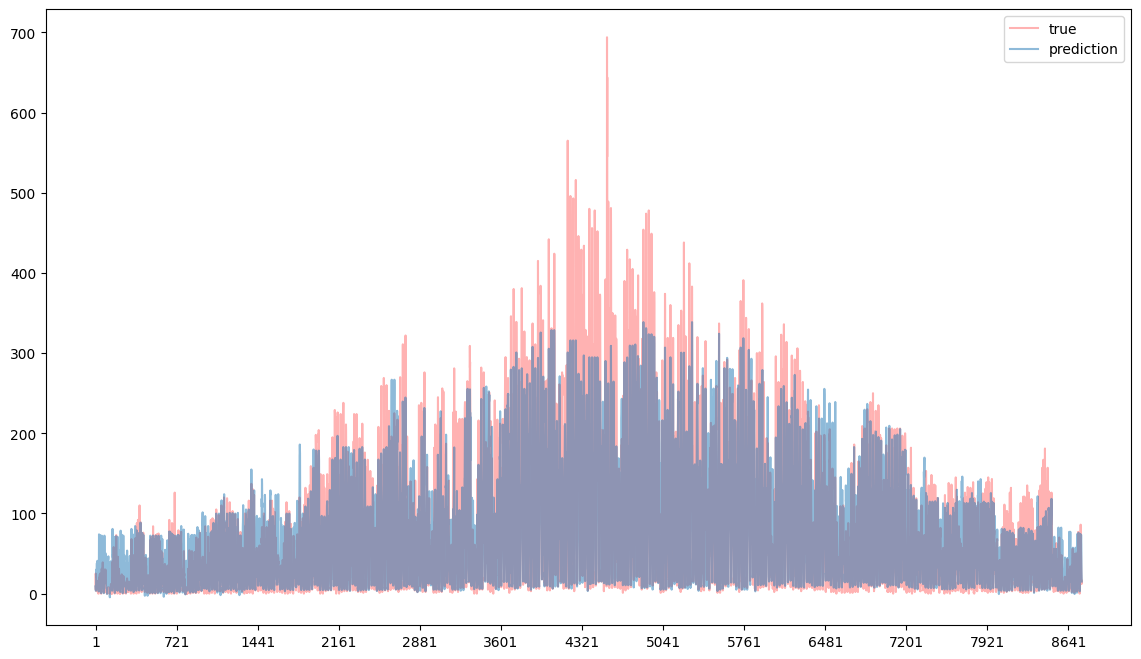

In [53]:
plt.figure(figsize=(14,8))
plt.plot(range(len(y_test)), y_test, c='r', alpha=0.3, label='true')
plt.plot(range(len(y_pred)), y_pred, alpha=0.5, label='prediction')

plt.xticks(np.arange(1, 8769, 720))
plt.legend()

## Updating the XGBoost Model

In [87]:
# create an xgboost regression model
xgb_r = XGBRegressor(objective ='reg:squarederror', n_estimators=10, max_depth=7, eta=0.1)
        

xgb_r.fit(X_train, y_train)
y_pred = xgb_r.predict(X_test)
scores_r2 = r2_score(y_test , y_pred)
scores_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
scores_msle = mean_squared_log_error(y_test , y_pred)
print(f"R2 Score={scores_r2}")
print(f"RMSE Score={scores_rmse}")
print(f"MSLE Score={scores_msle}")

R2 Score=0.5238767466161425
RMSE Score=56.55398313489262
MSLE Score=0.4266593864569875


# Random Forest Regressor

In [20]:
# create an RandomForest regression model
rf_r = RandomForestRegressor(max_depth=2, random_state=0)
        

rf_r.fit(X_train, y_train)
y_pred = rf_r.predict(X_test)
scores_r2 = r2_score(y_test , y_pred)
scores_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
scores_msle = mean_squared_log_error(y_test , y_pred)
print(f"R2 Score={scores_r2}")
print(f"RMSE Score={scores_rmse}")
print(f"MSLE Score={scores_msle}")

R2 Score=0.4861864617790004
RMSE Score=58.749783874253055
MSLE Score=1.2080456974478007


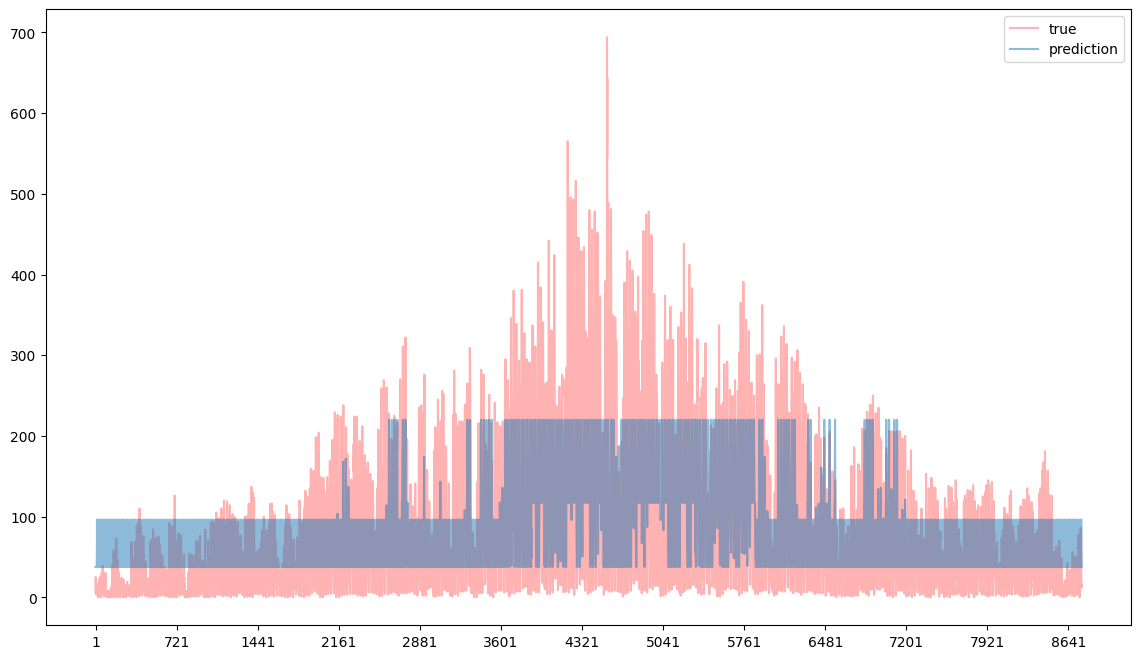

In [21]:
plt.figure(figsize=(14,8))
plt.plot(range(len(y_test)), y_test, c='r', alpha=0.3, label='true')
plt.plot(range(len(y_pred)), y_pred, alpha=0.5, label='prediction')

plt.xticks(np.arange(1, 8769, 720))
plt.legend()

# ElasticNet Regressor

In [90]:
from sklearn.linear_model import ElasticNet

In [91]:
# create an ElasticNet regression model
en_r = ElasticNet(alpha=1.0, l1_ratio=0.5)     

en_r.fit(X_train, y_train)
y_pred = en_r.predict(X_test)
scores_r2 = r2_score(y_test , y_pred)
scores_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
scores_msle = mean_squared_log_error(y_test , y_pred)
print(f"R2 Score={scores_r2}")
print(f"RMSE Score={scores_rmse}")
print(f"MSLE Score={scores_msle}")

R2 Score=0.2151705350057127
RMSE Score=72.60911635555561
MSLE Score=1.5718955572120779


# AdaBoostRegressor Model

In [16]:
from sklearn.ensemble import AdaBoostRegressor

In [18]:
# create an AdaBoost regression model  
ada_r = AdaBoostRegressor(random_state=0, n_estimators=100)   

ada_r.fit(X_train, y_train)
y_pred = ada_r.predict(X_test)
scores_r2 = r2_score(y_test , y_pred)
scores_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
scores_rmsle = np.sqrt(mean_squared_log_error(y_test , y_pred))
print(f"R2 Score={scores_r2}")
print(f"RMSE Score={scores_rmse}")
print(f"RMSLE Score={scores_msle}")

R2 Score=0.5968693157727618
RMSE Score=52.03869890179855
RMSLE Score=1.1623565037406434


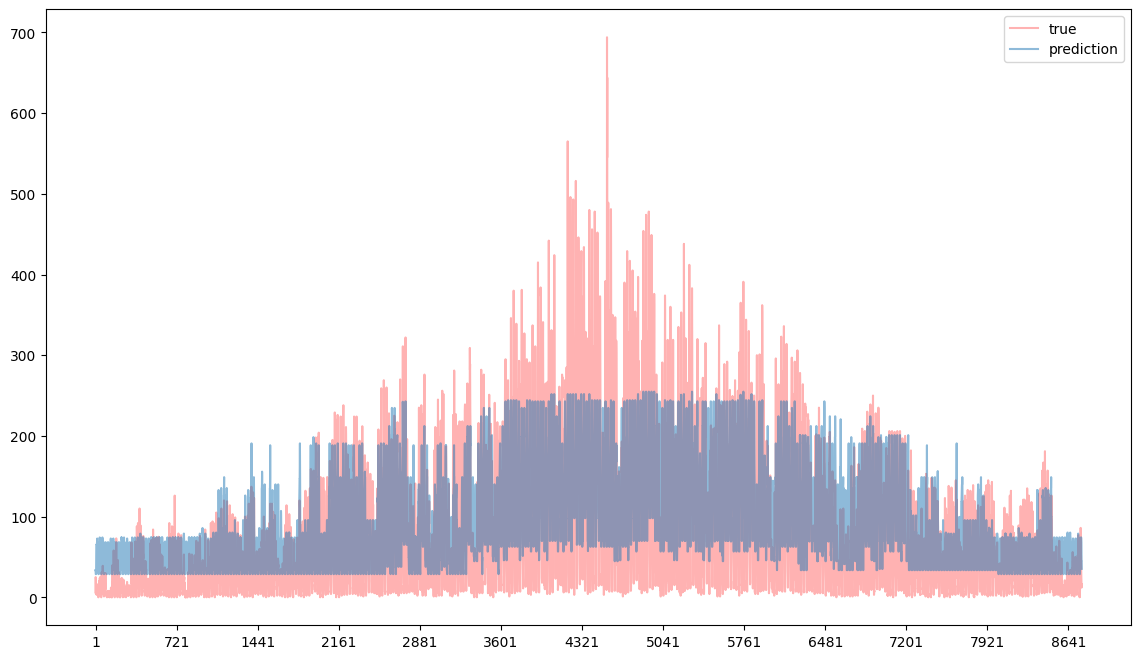

In [19]:
plt.figure(figsize=(14,8))
plt.plot(range(len(y_test)), y_test, c='r', alpha=0.3, label='true')
plt.plot(range(len(y_pred)), y_pred, alpha=0.5, label='prediction')

plt.xticks(np.arange(1, 8769, 720))
plt.legend()